In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (16,8)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 인천시 데이터  
- 쏠림현상해결 데이터  
     - 우선순위를 통해 선정한 그리드 100개(대여소)를 선정  
     - 쏠림현상이 심한 곳을 QGIS를 이용하여 해결  
     - 그리드 재설정

In [2]:
pb = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/Incheon_Grid.csv", encoding = 'cp949')

In [3]:
pb

,field_1,field_1_1,grid,rank_x,fid,ADM_DR_NM,rank_y
0,0.0,2388.0,그리드3211,1.0,3211,주안4동,1.0
1,1.0,2068.0,그리드2783,2.0,2783,주안1동,2.0
2,2.0,608.0,그리드1061,3.0,1061,용현5동,4.0
3,3.0,2024.0,그리드2728,4.0,2728,주안1동,5.0
4,4.0,526.0,그리드941,5.0,941,용현5동,11.0
...,...,...,...,...,...,...,...
95,NaN,2560.0,그리드3503,94.0,3503,NaN,NaN
96,NaN,513.0,그리드928,95.0,928,NaN,NaN
97,NaN,264.0,그리드575,97.0,575,NaN,NaN
98,NaN,2057.0,그리드2772,98.0,2772,NaN,NaN


In [4]:
pb['fid']

0     3211
1     2783
2     1061
3     2728
4      941
      ... 
95    3503
96     928
97     575
98    2772
99    2080
Name: fid, Length: 100, dtype: int64

In [5]:
ich = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/Incheon_Total.csv", encoding = 'cp949')

In [6]:
ich

,grid,rank,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
0,3211,1,0.00,6398.2700,7994075.00,0.0,0.0000,0.000,681.770,0.0,414.350416,2042.522003,295.293579,43.297457,1.5,5436,167.433246
1,2783,2,0.00,34650.8265,4841.13,0.0,0.0000,0.000,0.000,33578.9,418.005942,1000.365546,145.981155,27.296763,2.0,12132,200.089197
2,2724,3,0.00,14927.6500,8393.52,0.0,990.6000,0.000,1858.980,33578.9,302.970723,1057.394493,237.953719,41.047116,2.0,12132,200.178224
3,1061,4,0.00,51159.2200,0.00,0.0,87634.3188,0.000,0.000,0.0,623.304372,461.616796,127.875858,130.520513,0.5,23824,86.278613
4,2728,5,0.00,14331.5700,1690.85,0.0,11332.1100,0.000,0.000,0.0,492.159492,1443.647732,66.600216,22.627794,1.0,12132,151.149628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,3098,2648,2407.20,2466.3800,0.00,0.0,0.0000,13265.415,4059.179,0.0,227.525770,2577.619939,939.433839,57.633144,1.5,9503,259.614351
2648,3115,2649,12943.79,0.0000,0.00,0.0,0.0000,0.000,587.210,0.0,53.243772,2993.882214,1352.499623,255.513536,4.5,7239,34.084735
2649,3586,2650,0.00,0.0000,0.00,0.0,0.0000,0.000,57897.340,0.0,221.413224,3460.695385,345.964117,130.864959,0.5,6826,0.000000
2650,3525,2651,0.00,0.0000,0.00,0.0,0.0000,0.000,61825.810,0.0,218.115457,3346.933911,480.335337,110.914349,1.0,6826,0.000000


In [7]:
ich_bf = ich[ich['grid'].isin(pb['fid'])]

In [8]:
ich = ich[ich['rank'] < 100]

In [9]:
ich.drop(columns=['grid'], inplace=True)

In [10]:
ich

,rank,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
0,1,0.0,6398.2700,7994075.00,0.0,0.0000,0.0,681.77,0.00,414.350416,2042.522003,295.293579,43.297457,1.5,5436,167.433246
1,2,0.0,34650.8265,4841.13,0.0,0.0000,0.0,0.00,33578.90,418.005942,1000.365546,145.981155,27.296763,2.0,12132,200.089197
2,3,0.0,14927.6500,8393.52,0.0,990.6000,0.0,1858.98,33578.90,302.970723,1057.394493,237.953719,41.047116,2.0,12132,200.178224
3,4,0.0,51159.2200,0.00,0.0,87634.3188,0.0,0.00,0.00,623.304372,461.616796,127.875858,130.520513,0.5,23824,86.278613
4,5,0.0,14331.5700,1690.85,0.0,11332.1100,0.0,0.00,0.00,492.159492,1443.647732,66.600216,22.627794,1.0,12132,151.149628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0.0,8021.3500,0.00,0.0,0.0000,0.0,200.89,0.00,574.306012,1541.306814,37.598577,78.603361,1.5,24663,200.394787
95,96,0.0,7152.0850,0.00,0.0,1302.7200,0.0,6323.55,0.00,703.540999,332.959793,653.632286,81.919628,2.5,8420,350.432870
96,97,0.0,2688.5350,0.00,0.0,1475.0400,0.0,5030.42,2388.00,458.452741,766.519198,1379.393073,54.750773,1.5,23076,410.403891
97,98,0.0,355.7000,0.00,0.0,7622.5900,0.0,0.00,0.00,876.895673,1955.098518,215.493085,47.361179,0.0,7044,0.000000


In [11]:
ich_bf.drop(columns=['grid'], inplace=True)

In [12]:
ich.set_index(['rank'], inplace=True)

In [13]:
ich_bf.set_index(['rank'], inplace=True)

In [14]:
ich_bf

,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
rank,,,,,,,,,,,,,,,
1,0.0,6398.2700,7994075.00,0.0,0.0000,0.0,681.77,0.00,414.350416,2042.522003,295.293579,43.297457,1.5,5436,167.433246
2,0.0,34650.8265,4841.13,0.0,0.0000,0.0,0.00,33578.90,418.005942,1000.365546,145.981155,27.296763,2.0,12132,200.089197
4,0.0,51159.2200,0.00,0.0,87634.3188,0.0,0.00,0.00,623.304372,461.616796,127.875858,130.520513,0.5,23824,86.278613
5,0.0,14331.5700,1690.85,0.0,11332.1100,0.0,0.00,0.00,492.159492,1443.647732,66.600216,22.627794,1.0,12132,151.149628
9,0.0,0.0000,0.00,0.0,22474.9100,0.0,0.00,97237.00,703.973935,307.444432,120.654764,56.348401,0.5,23398,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,3681.5100,0.00,0.0,0.0000,0.0,0.00,0.00,359.055684,1319.667403,1057.753892,7.849454,3.0,16285,189.623742
290,0.0,3326.5650,0.00,0.0,3726.4200,0.0,245.13,2746.49,427.450083,2699.368781,829.730956,91.992825,0.5,14939,248.549390
1097,0.0,0.0000,0.00,0.0,18193.5600,0.0,0.00,0.00,847.165423,3753.616105,918.690164,146.586945,2.5,7239,0.000000


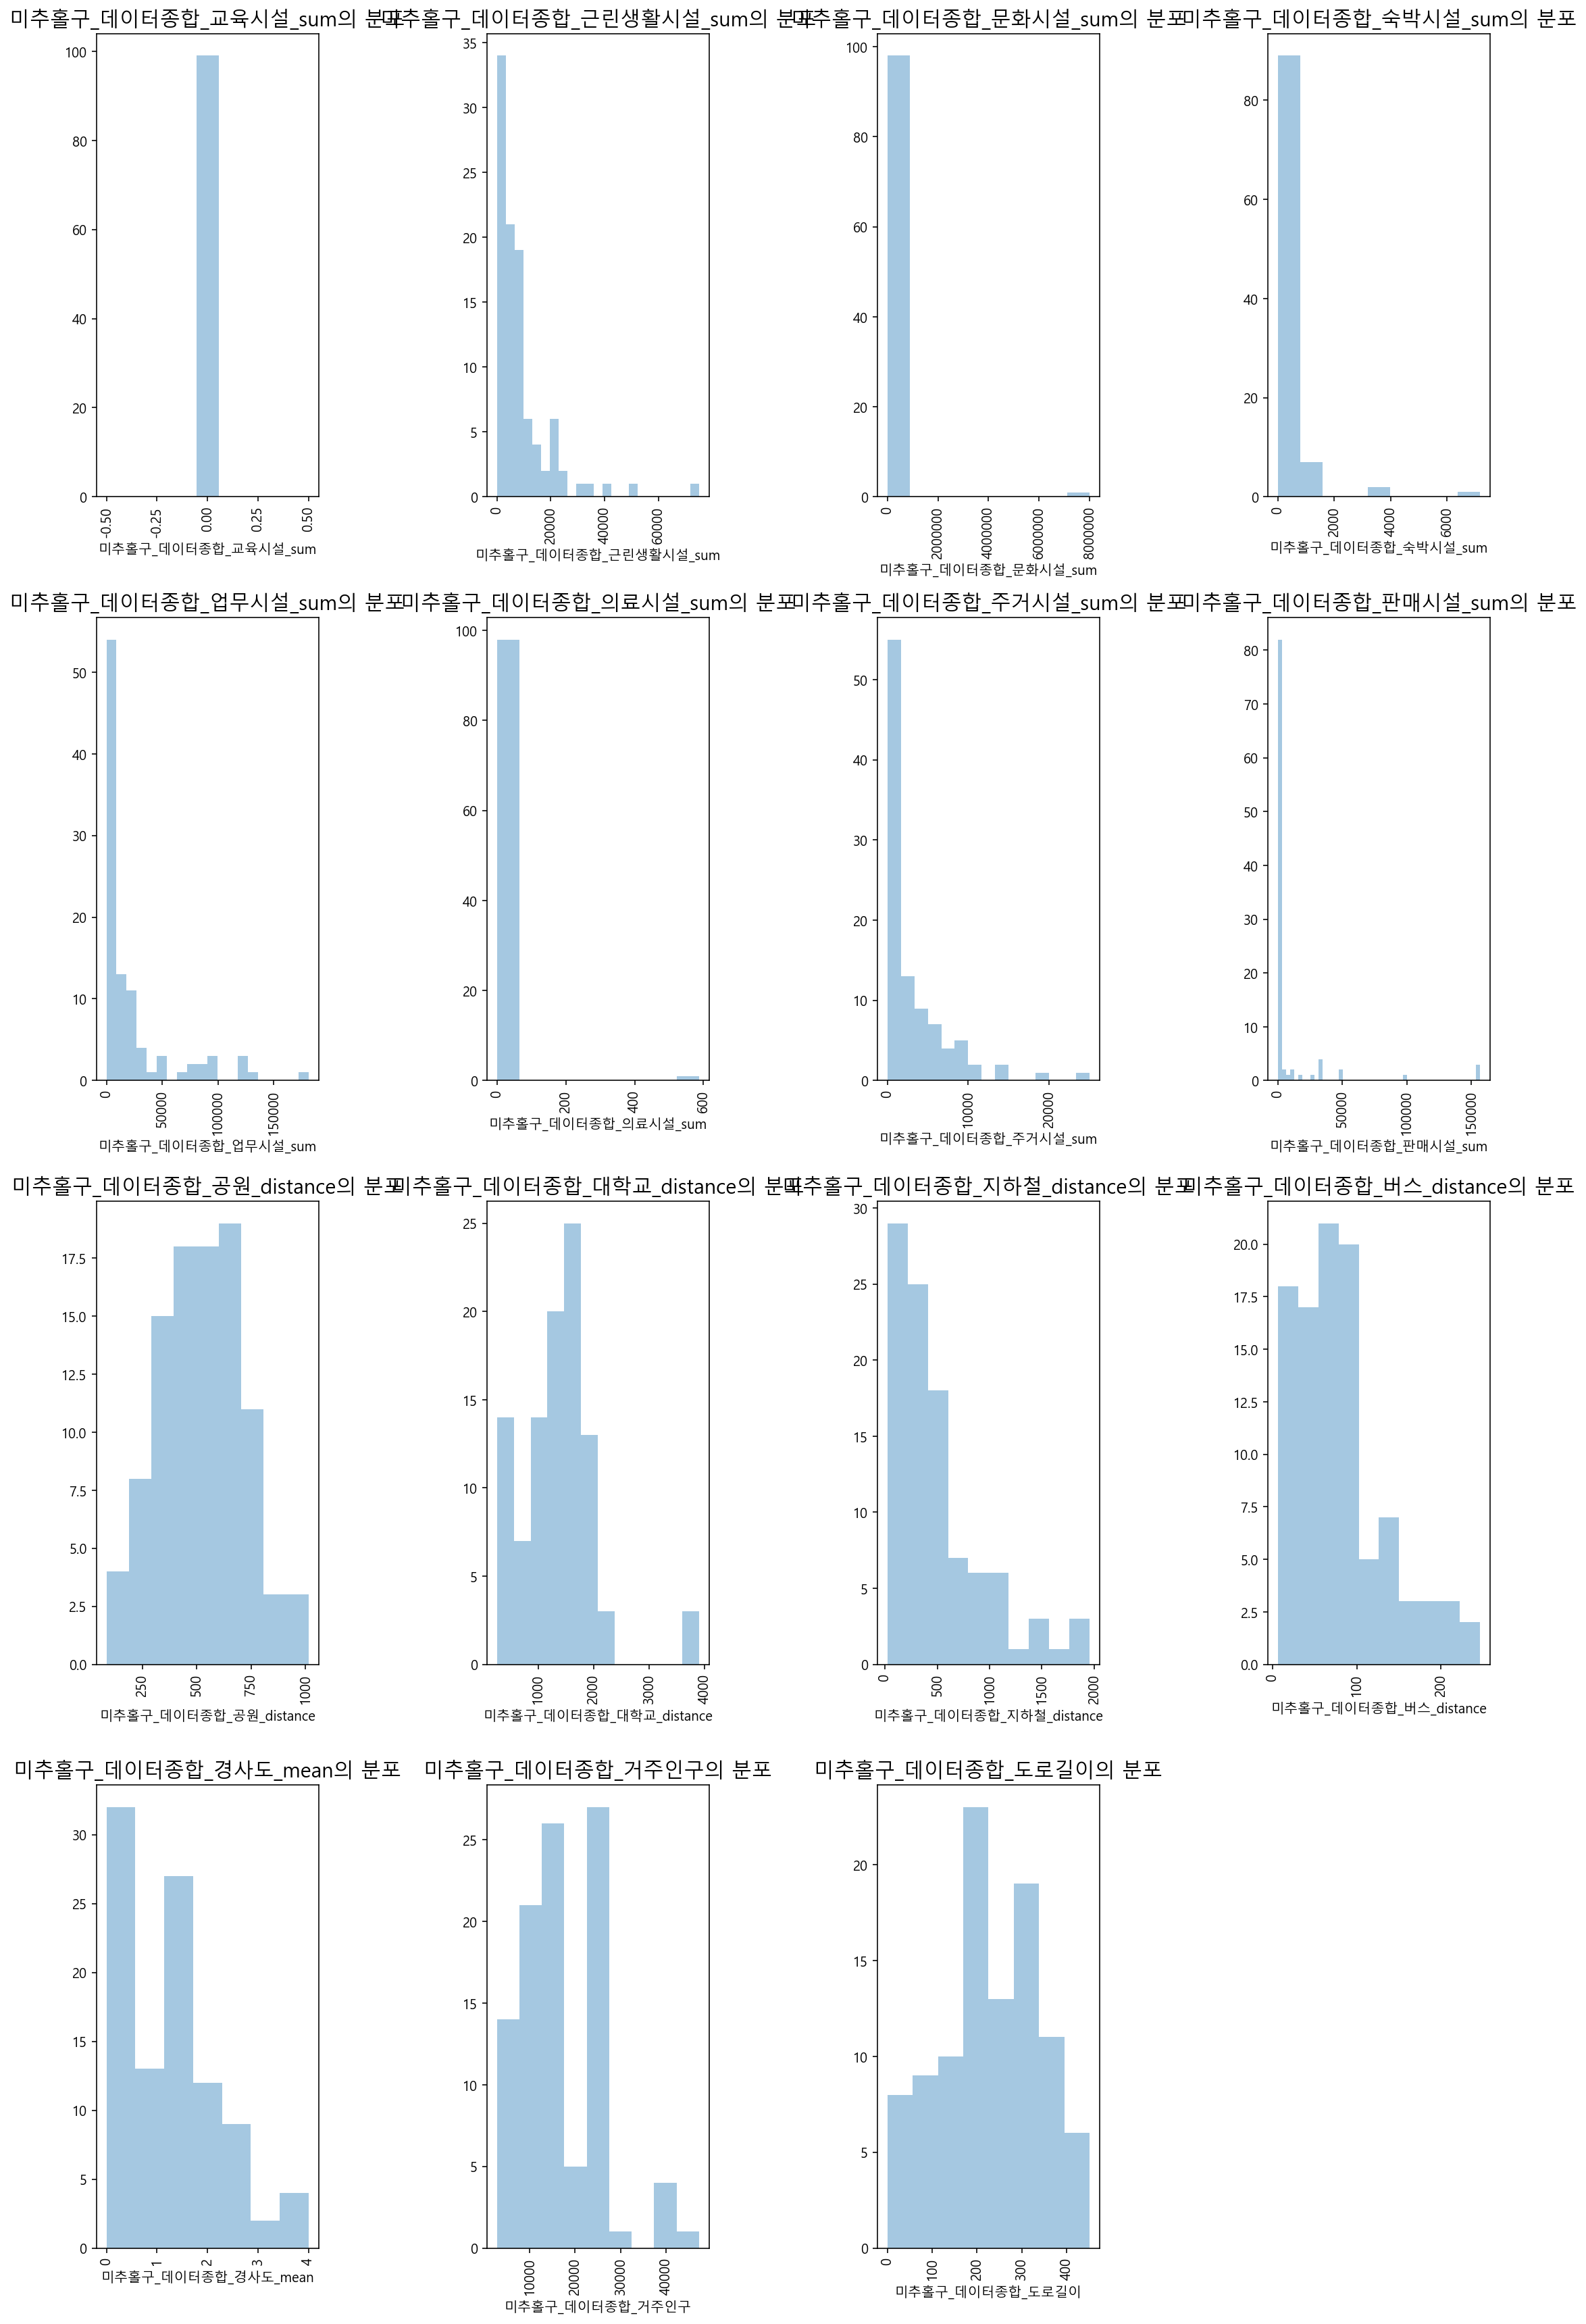

In [15]:
# 분포확인
plt.figure(figsize=(16,24)) 
n=1
for feature in ich.columns:
    ax = plt.subplot(4,4,n) 
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(ich[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout() 
plt.show()

In [16]:
# 왜도 확인
from scipy.stats import skew

features_index = ich.dtypes[ich.dtypes != 'object'].index
skew_features = ich[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

미추홀구_데이터종합_의료시설_sum        9.798480
미추홀구_데이터종합_문화시설_sum        9.798435
미추홀구_데이터종합_숙박시설_sum        5.390999
미추홀구_데이터종합_판매시설_sum        4.159692
미추홀구_데이터종합_근린생활시설_sum      3.079808
미추홀구_데이터종합_주거시설_sum        2.354132
미추홀구_데이터종합_업무시설_sum        2.215878
미추홀구_데이터종합_지하철_distance    1.474642
미추홀구_데이터종합_대학교_distance    1.255853
미추홀구_데이터종합_버스_distance     1.103552
dtype: float64


In [17]:
# 왜도 확인
from scipy.stats import skew

features_index = ich_bf.dtypes[ich_bf.dtypes != 'object'].index
skew_features = ich_bf[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

미추홀구_데이터종합_의료시설_sum        9.849371
미추홀구_데이터종합_문화시설_sum        9.849356
미추홀구_데이터종합_교육시설_sum        7.912990
미추홀구_데이터종합_숙박시설_sum        7.600239
미추홀구_데이터종합_판매시설_sum        5.523155
미추홀구_데이터종합_근린생활시설_sum      2.947706
미추홀구_데이터종합_업무시설_sum        2.825940
미추홀구_데이터종합_주거시설_sum        2.645813
미추홀구_데이터종합_버스_distance     2.008557
미추홀구_데이터종합_거주인구            1.036949
미추홀구_데이터종합_대학교_distance    1.003119
dtype: float64


In [18]:
# 복사
ich_log = ich.copy()

In [19]:
# 복사
ich_log_bf = ich_bf.copy()

In [20]:
# log변환
ich_log[skew_features_top.index] = np.log1p(ich[skew_features_top.index])
ich_log

,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
rank,,,,,,,,,,,,,,,
1,0.0,8.763939,15.894211,0.0,0.000000,0.0,6.526158,0.000000,414.350416,7.622430,295.293579,3.790927,1.5,8.600983,167.433246
2,0.0,10.453106,8.485110,0.0,0.000000,0.0,0.000000,10.421683,418.005942,6.909120,145.981155,3.342747,2.0,9.403684,200.089197
3,0.0,9.611037,9.035334,0.0,6.899320,0.0,7.528321,10.421683,302.970723,6.964508,237.953719,3.738791,2.0,9.403684,200.178224
4,0.0,10.842718,0.000000,0.0,11.380939,0.0,0.000000,0.000000,623.304372,6.136899,127.875858,4.879163,0.5,10.078491,86.278613
5,0.0,9.570290,7.433578,0.0,9.335484,0.0,0.000000,0.000000,492.159492,7.275621,66.600216,3.162424,1.0,9.403684,151.149628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,8.989987,0.000000,0.0,0.000000,0.0,5.307723,0.000000,574.306012,7.341035,37.598577,4.377056,1.5,10.113100,200.394787
96,0.0,8.875299,0.000000,0.0,7.172977,0.0,8.752194,0.000000,703.540999,5.811021,653.632286,4.417872,2.5,9.038484,350.432870
97,0.0,7.897124,0.000000,0.0,7.297118,0.0,8.523458,7.778630,458.452741,6.643163,1379.393073,4.020891,1.5,10.046592,410.403891


In [21]:
# log변환
ich_log_bf[skew_features_top.index] = np.log1p(ich_bf[skew_features_top.index])
ich_log_bf

,미추홀구_데이터종합_교육시설_sum,미추홀구_데이터종합_근린생활시설_sum,미추홀구_데이터종합_문화시설_sum,미추홀구_데이터종합_숙박시설_sum,미추홀구_데이터종합_업무시설_sum,미추홀구_데이터종합_의료시설_sum,미추홀구_데이터종합_주거시설_sum,미추홀구_데이터종합_판매시설_sum,미추홀구_데이터종합_공원_distance,미추홀구_데이터종합_대학교_distance,미추홀구_데이터종합_지하철_distance,미추홀구_데이터종합_버스_distance,미추홀구_데이터종합_경사도_mean,미추홀구_데이터종합_거주인구,미추홀구_데이터종합_도로길이
rank,,,,,,,,,,,,,,,
1,0.0,8.763939,15.894211,0.0,0.000000,0.0,6.526158,0.000000,414.350416,7.622430,295.293579,3.790927,1.5,8.600983,167.433246
2,0.0,10.453106,8.485110,0.0,0.000000,0.0,0.000000,10.421683,418.005942,6.909120,145.981155,3.342747,2.0,9.403684,200.089197
4,0.0,10.842718,0.000000,0.0,11.380939,0.0,0.000000,0.000000,623.304372,6.136899,127.875858,4.879163,0.5,10.078491,86.278613
5,0.0,9.570290,7.433578,0.0,9.335484,0.0,0.000000,0.000000,492.159492,7.275621,66.600216,3.162424,1.0,9.403684,151.149628
9,0.0,0.000000,0.000000,0.0,10.020199,0.0,0.000000,11.484917,703.973935,5.731542,120.654764,4.049145,0.5,10.060449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,8.211350,0.000000,0.0,0.000000,0.0,0.000000,0.000000,359.055684,7.185892,1057.753892,2.180356,3.0,9.698061,189.623742
290,0.0,8.109996,0.000000,0.0,8.223472,0.0,5.505860,7.918443,427.450083,7.901144,829.730956,4.532522,0.5,9.611797,248.549390
1097,0.0,0.000000,0.000000,0.0,9.808878,0.0,0.000000,0.000000,847.165423,8.230741,918.690164,4.994417,2.5,8.887376,0.000000


# 서울시 데이터

In [22]:
total = pd.read_csv("C:/Users/keogu/Desktop/IGPS/Data/Seoul_Total.csv")

In [23]:
total

,대여소번호,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
0,502.0,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640,258.605479
1,207.0,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445,250.934247
2,3533.0,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995,135.227397
3,1210.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,324.671476,2761.514679,145.087355,70.406036,0.333333,24052,348.694407,133.017808
4,1308.0,39658.62,27219.63,552.09,0.0,3227.37,0.0,8097.88,0.00,332.366534,749.646476,408.450803,12.103377,1.250000,41364,1258.678353,117.180822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,664.0,61560.86,0.00,7622.29,0.0,0.00,0.0,0.00,0.00,332.212513,88.481654,592.515746,370.864704,2.000000,8727,0.000000,7.950860
1478,2287.0,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227,0.664384
1479,2391.0,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938,0.583562
1480,465.0,0.00,6864.08,0.00,0.0,0.00,0.0,527.37,0.00,377.608155,301.960064,1245.792726,167.833245,6.250000,1224,424.978106,3.122850


In [24]:
total.set_index(['대여소번호'], inplace=True)

In [25]:
# 왜도 확인
from scipy.stats import skew

features_index = total.dtypes[total.dtypes != 'object'].index
skew_features = total[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        17.913397
숙박시설_sum        11.841145
의료시설_sum        10.670393
판매시설_sum         9.106897
근린생활시설_sum       8.937168
주거시설_sum         7.143945
교육시설_sum         4.636081
업무시설_sum         4.076714
지하철_distance     2.959794
일별대여평균이용량        2.951318
공원_distance      2.918526
버스_distance      2.488875
경사도_mean         1.710297
dtype: float64


In [26]:
# 복사
total_log = total.copy()

In [27]:
# log변환
total_log[skew_features_top.index] = np.log1p(total[skew_features_top.index])
total_log

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
502.0,0.000000,0.000000,0.000000,0.0,6.810804,0.0,11.831935,0.000000,4.930944,1430.131460,4.040821,4.097812,0.405465,24085,714.440640,5.559163
207.0,0.000000,5.092092,0.000000,0.0,0.000000,0.0,11.039396,0.000000,5.351727,2254.225628,4.290482,3.473748,0.693147,15710,356.416445,5.529168
3533.0,0.000000,8.659472,8.454994,0.0,0.000000,0.0,7.050461,11.412336,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995,4.914326
1210.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5.785889,2761.514679,4.984205,4.268382,0.287682,24052,348.694407,4.897973
1308.0,10.588089,10.211730,6.315521,0.0,8.079733,0.0,8.999481,0.000000,5.809243,749.646476,6.014817,2.572870,0.810930,41364,1258.678353,4.772216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,11.027798,0.000000,8.938963,0.0,0.000000,0.0,0.000000,0.000000,5.808780,88.481654,6.386064,5.918530,1.098612,8727,0.000000,2.191750
2287.0,0.000000,8.250980,0.000000,0.0,0.000000,0.0,8.465902,0.000000,5.236975,5396.477786,8.152100,5.610680,2.133509,8164,749.655227,0.509455
2391.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.148156,0.000000,5.907343,4119.802431,7.096272,4.982320,1.704748,14769,345.607938,0.459677


# 회귀분석

In [28]:
y_train = total_log['일별대여평균이용량']
X_train = total_log.drop('일별대여평균이용량', axis=1, inplace=False)

In [29]:
X_test = ich_log_bf

In [30]:
y_train_scaled = y_train.copy()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [31]:
from sklearn.preprocessing import MinMaxScaler

#원래 값을 구하기 위해
scaler_train = MinMaxScaler()
X_train_scaled = scaler_train.fit_transform(X_train)

scaler_test = MinMaxScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
pred_lr = lr.predict(X_test_scaled)

In [33]:
pred_lr= scaler_y.inverse_transform(np.array(pred_lr).reshape(-1,1))
pred_lr = np.expm1(pred_lr)

In [34]:
pred_lr

array([[22.1565427 ],
       [28.89718461],
       [64.69484036],
       [39.22691073],
       [69.33740022],
       [31.37360867],
       [68.39179884],
       [25.34664955],
       [45.66724786],
       [41.5225835 ],
       [38.47883984],
       [35.5661994 ],
       [22.31990106],
       [40.99377793],
       [37.50701993],
       [55.80593907],
       [35.36369001],
       [54.27573668],
       [31.35139891],
       [32.51363039],
       [42.79491144],
       [25.7213625 ],
       [40.17910765],
       [26.12487378],
       [37.12694904],
       [30.29031553],
       [26.97264811],
       [39.44975961],
       [29.70067283],
       [19.19042957],
       [17.98610623],
       [30.23258138],
       [19.75020004],
       [31.06050935],
       [28.91366831],
       [34.14462291],
       [23.98436063],
       [49.28015273],
       [19.95354871],
       [12.13122613],
       [33.23009713],
       [31.78698501],
       [24.0505345 ],
       [12.80537008],
       [57.99800944],
       [17

In [35]:
sum(pred_lr)

array([3201.44421398])

In [36]:
len(pred_lr)

100

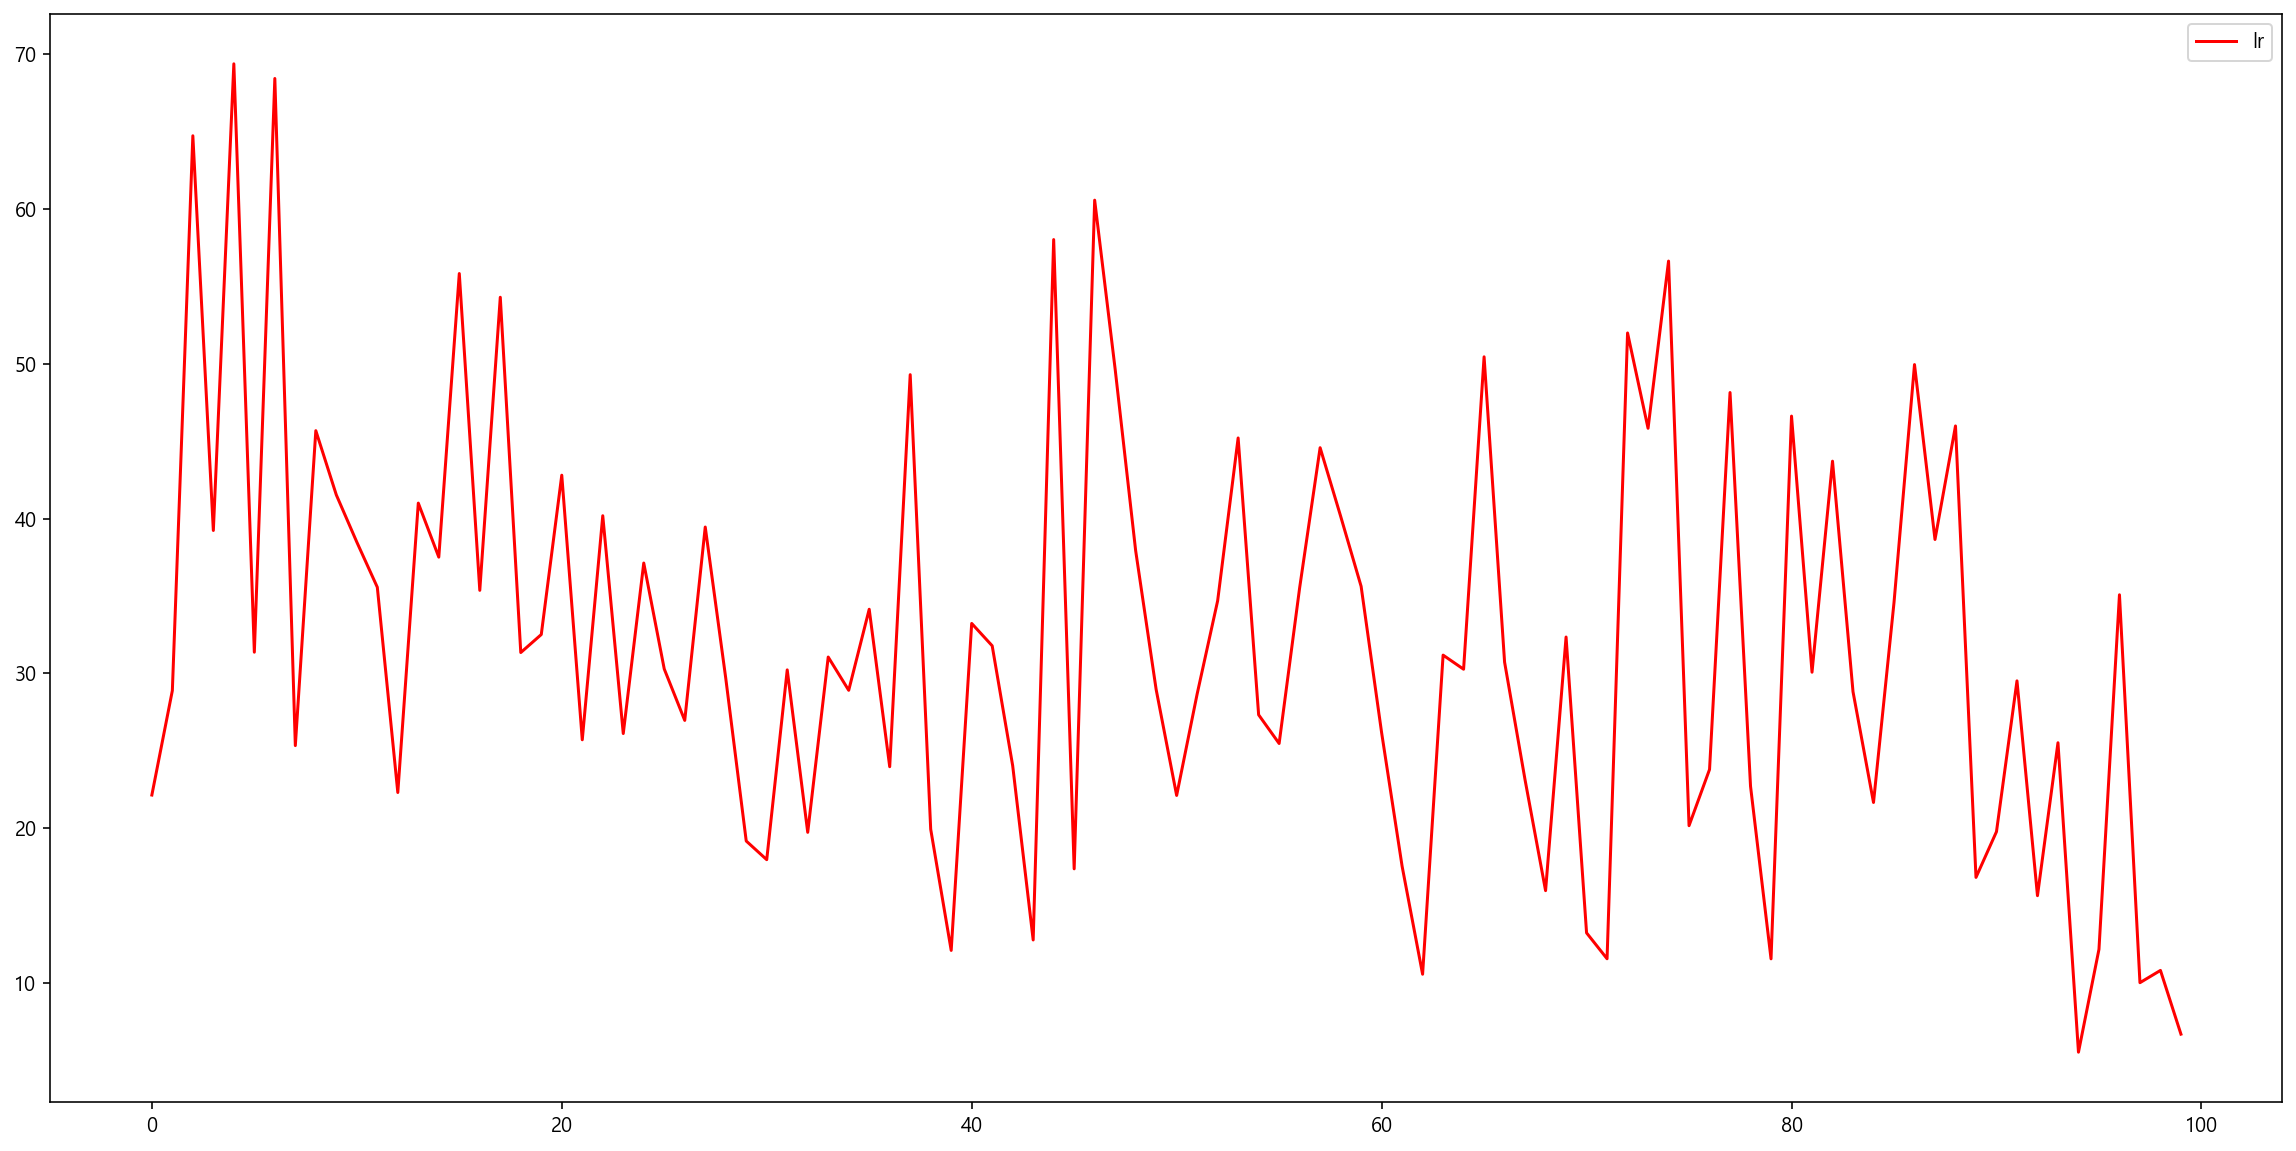

In [37]:
plt.figure(figsize=(20,10))
plt.plot(pred_lr, 'r', label='lr')
plt.legend()
plt.show()